##Statistics Advanced - 2

1. What is hypothesis testing in statistics?
  - Hypothesis testing is a formal method for using sample data to decide between two competing statements (hypotheses) about a population parameter. You set up a null hypothesis (H₀), which represents the default or no-effect position, and an alternative hypothesis (H₁), which represents the effect or difference you want to detect. Using a test statistic derived from the sample, you compute a probability (p-value) or compare the statistic to critical values to decide whether the observed data are unlikely under H₀. If unlikely, you reject H₀ in favor of H₁; otherwise you fail to reject H₀.

2. What is the null hypothesis, and how does it differ from the alternative
hypothesis?
  - Null hypothesis (H₀): a statement of no effect or status quo (e.g., μ = 50). It's the hypothesis you assume true unless data show otherwise.

  - Alternative hypothesis (H₁ or Ha): the statement that contradicts H₀ (e.g., μ ≠ 50, μ > 50, or μ < 50). It represents the presence of an effect or difference.

    Difference: H₀ is the baseline claim being tested; H₁ is what we conclude if there is sufficient evidence against H₀.



3. Explain the significance level in hypothesis testing and its role in deciding
the outcome of a test.
  - The significance level α is the threshold probability used to decide whether to reject H₀. It is the maximum acceptable probability of committing a Type I error (rejecting a true H₀). Common choices are α = 0.05 or 0.01. If the p-value ≤ α, reject H₀; if p-value > α, fail to reject H₀. α determines the critical region and affects the test’s sensitivity.

4. What are Type I and Type II errors? Give examples of each.
  - Type I error (false positive): Rejecting H₀ when it's actually true.
  
     Example: concluding a new drug works (reject H₀: drug has no effect) when it actually doesn't. Probability = α.

  - Type II error (false negative): Failing to reject H₀ when H₁ is true.
  
     Example: concluding a drug has no effect (fail to reject H₀) when it actually does. Probability = β. Power = 1 − β (probability to correctly reject a false H₀).

5. What is the difference between a Z-test and a T-test? Explain when to use
each.
  - Z-test: Used when the population standard deviation (σ) is known or when the sample size is large enough that the sampling distribution of the mean is approximately normal and σ is known or approximated reliably. Uses the standard normal (Z) distribution.

  - T-test: Used when σ is unknown and the sample size is small (typically n < 30); it uses the Student’s t-distribution with (n−1) degrees of freedom. The t-distribution accounts for extra uncertainty from estimating σ from the sample.

    Rule of thumb: use t-test when σ is unknown and n is small; Z-test is used when σ is known or n is large and Gaussian approximation is valid.

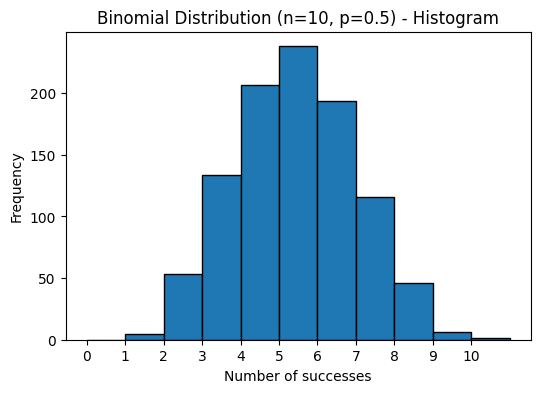

Sample size: 1000
Mean (empirical): 4.939
Variance (empirical): 2.49177077077077


In [1]:
#6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.


import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n, p = 10, 0.5
size = 1000
binom_samples = np.random.binomial(n, p, size=size)

plt.figure(figsize=(6,4))
plt.hist(binom_samples, bins=range(n+2), edgecolor='black')
plt.title('Binomial Distribution (n=10, p=0.5) - Histogram')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.xticks(range(n+1))
plt.show()

print("Sample size:", size)
print("Mean (empirical):", np.mean(binom_samples))
print("Variance (empirical):", np.var(binom_samples, ddof=1))


In [2]:
'''
7.  Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6, 50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9, 50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
'''

import numpy as np
from scipy import stats

sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
arr = np.array(sample_data)
n_obs = len(arr)
sample_mean = arr.mean()
sample_std = arr.std(ddof=1)
mu0 = 50.0

se = sample_std / np.sqrt(n_obs)
z_stat = (sample_mean - mu0) / se
p_value_two_sided = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("n =", n_obs)
print("Sample mean =", sample_mean)
print("Sample std =", sample_std)
print("Standard error =", se)
print("Z statistic =", z_stat)
print("Two-sided p-value =", p_value_two_sided)


n = 36
Sample mean = 50.08888888888889
Sample std = 0.5365379910807955
Standard error = 0.08942299851346591
Z statistic = 0.9940271559503017
Two-sided p-value = 0.3202096468890012


Sample mean = 4.700265499607556
Sample std = 1.8608266719640836
95% CI for mean: [4.3356, 5.0650]


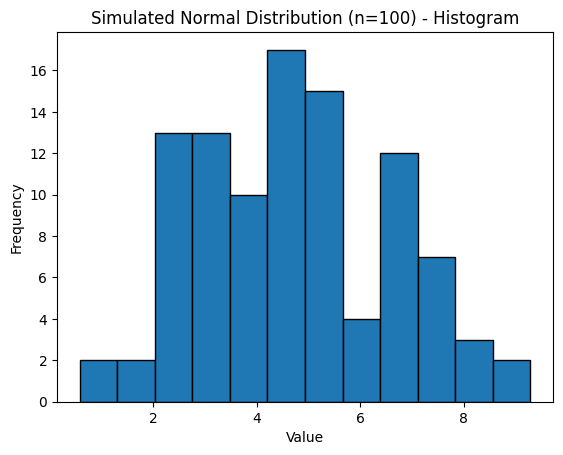

In [3]:
'''
8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using
Matplotlib.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(2025)
n_sim = 100
mu_sim, sigma_sim = 5.0, 2.0
data_sim = np.random.normal(loc=mu_sim, scale=sigma_sim, size=n_sim)

sample_mean_sim = data_sim.mean()
sample_std_sim = data_sim.std(ddof=1)
se_sim = sample_std_sim / np.sqrt(n_sim)
z_95 = stats.norm.ppf(0.975)
ci_lower = sample_mean_sim - z_95 * se_sim
ci_upper = sample_mean_sim + z_95 * se_sim

print("Sample mean =", sample_mean_sim)
print("Sample std =", sample_std_sim)
print("95% CI for mean: [{:.4f}, {:.4f}]".format(ci_lower, ci_upper))

plt.hist(data_sim, bins=12, edgecolor='black')
plt.title('Simulated Normal Distribution (n=100) - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



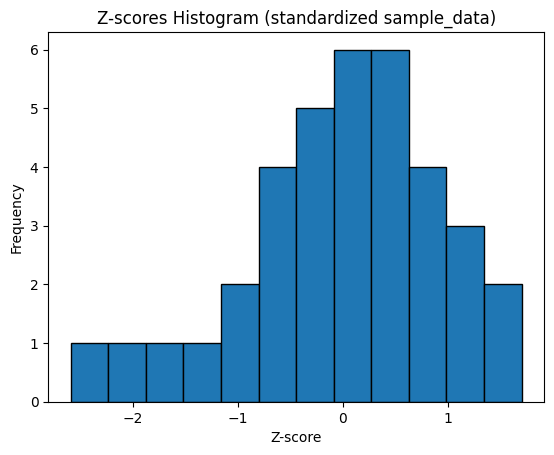

Mean of z-scores (should be ~0): 7.108511310447183e-16
Std of z-scores (should be ~1): 1.0
First 10 z-scores: [-1.8431  0.2071  1.6981 -2.5886  0.7662 -0.5384  0.3935  1.139   0.2071
 -0.9112]


In [4]:
'''
9. Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram.
Explain what the Z-scores represent in terms of standard deviations from the mean.
'''

import numpy as np
import matplotlib.pyplot as plt

def z_scores(data):
    data = np.array(data)
    mu = data.mean()
    sigma = data.std(ddof=1)
    return (data - mu) / sigma

zs = z_scores(arr)
plt.hist(zs, bins=12, edgecolor='black')
plt.title('Z-scores Histogram (standardized sample_data)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

print("Mean of z-scores (should be ~0):", zs.mean())
print("Std of z-scores (should be ~1):", zs.std(ddof=1))
print("First 10 z-scores:", np.round(zs[:10], 4))
